### Dimensionality Reduction
 - <b>PCA</b> (Pricipal Component Analysis): for unsupervised data compression
 - <b>LDA</b> (Linear Discriminant Analysis): supervised dimensionality reduction technique for maximizing class seperability
 - <b>Kernel Pricipal Component Analysis</b>: nonlinear dimentionality reduction

#### Unsupervised dimensionality reduction via principal component analysis

PCA
1. Standardize the d-dimensionality reduction via principal component analysis-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Select k-dimensionality eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k<=d).
5. Construct a projection matrix W from the "top" k eigenvectors.
6. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

###### Total and explained variance (first 4 steps of PCA)

In [1]:
## Wine dataset
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                      header=None)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)>

In [11]:
## Split into train/test sets, 70/30 split respectively
### and standardize it to unit variance
#Step 1
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = \
             train_test_split(X, y,
             test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)


In [12]:
## Constructing the covariance matrix
# step 2
import numpy as np
cov_mat = np.cov(X_test_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print '\nEigenvalues \n%s' % eigen_vals


Eigenvalues 
[ 4.56925538  2.77783959  1.5624868   1.28185891  0.90546391  0.60179815
  0.44416355  0.25505244  0.11558188  0.16476973  0.20106681  0.12690572
  0.23904014]


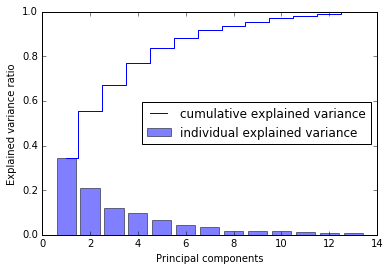

In [13]:
## sum of explained variance
## using cumsum (cumulative sum)
### then plot
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
       label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


### Feature transformation
(last 4 steps for PCA)

In [17]:
## sort eigenpairs by decreasing order of the eigenvalues
eigen_pairs = [(np.abs(eigen_vals[i], eigen_vecs[:,i])
               for i in range(len(eigen_vals)))]
eigen_pairs.sort(reverse=True)

In [19]:
## here we will choose top two eigenvectors(for illustration),
## that correspond to the larges values to capture, ~60% of 
## the variance in this dataset
####
# IN PRACTICE: the number of Pricipal Components has to be 
# determined from a trade-off between computational efficiency 
# and the performance of the classifier

# w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
#               eigen_pairs[1][1][:,np.newaxis]))
# print 'Matrix W:\n', w

w= np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)


TypeError: 'generator' object has no attribute '__getitem__'